In [14]:
import os
import ee
import geemap
from geemap import cartoee
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 

In [15]:
# If not working, just got to terminal and open python
# and do the following commands: 
# import ee
# ee.Authenticate() 
# This will redirect you to the webpage of EE and you can give permissino
# Run this cell once more it should return True
ee.Authenticate()

True

In [16]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [24]:
lon = -115.1585
lat = 36.1500
start_year = 1984
end_year = 2011

point = ee.Geometry.Point(lon, lat)
years = ee.List.sequence(start_year, end_year)


def get_best_image(year):
    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = ee.Date.fromYMD(year, 12, 31)
    image = (
        ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
        .filterBounds(point)
        .filterDate(start_date, end_date)
        .sort("CLOUD_COVER")
        .first()
    )
    return ee.Image(image)


collection = ee.ImageCollection(years.map(get_best_image))

In [25]:
vis_params = {"bands": ["SR_B4", "SR_B3", "SR_B2"], "min": 0, "max": 5000}

image = ee.Image(collection.first())
Map.addLayer(image, vis_params, "First image")
Map.setCenter(lon, lat, 8)
Map

EEException: ImageCollection.fromImages: Attempt to create an ImageCollection with non-image elements.

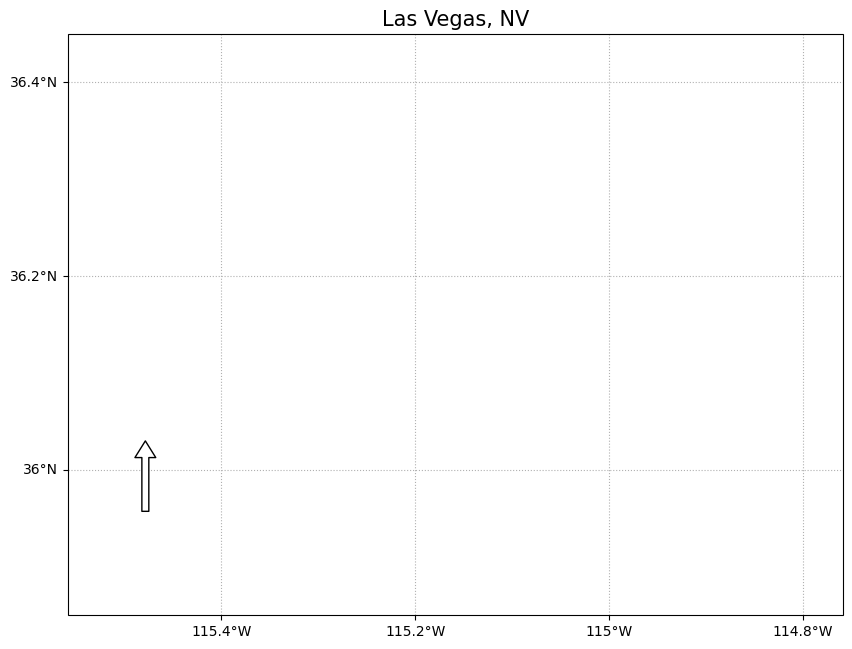

In [ ]:
w = 0.4
h = 0.3

region = [lon + w, lat - h, lon - w, lat + h]

fig = plt.figure(figsize=(10, 8))

# use cartoee to get a map
ax = cartoee.get_map(image, region=region, vis_params=vis_params)

# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[0.2, 0.2], linestyle=":")

# add north arrow
north_arrow_dict = {
    "text": "N",
    "xy": (0.1, 0.3),
    "arrow_length": 0.15,
    "text_color": "white",
    "arrow_color": "white",
    "fontsize": 20,
    "width": 5,
    "headwidth": 15,
    "ha": "center",
    "va": "center",
}
cartoee.add_north_arrow(ax, **north_arrow_dict)

# add scale bar
scale_bar_dict = {
    "length": 10,
    "xy": (0.1, 0.05),
    "linewidth": 3,
    "fontsize": 20,
    "color": "white",
    "unit": "km",
    "ha": "center",
    "va": "bottom",
}
cartoee.add_scale_bar_lite(ax, **scale_bar_dict)

ax.set_title(label="Las Vegas, NV", fontsize=15)

plt.show()